<a href="https://colab.research.google.com/github/NitheeshMS/Fitbit-Dataset-Info/blob/main/Week8_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # data arrays
import pandas as pd # data analysis and data manipulation
import datetime as dt #date time
import glob #retrieving file paths
import os #to perform operations related to file and directory handling
import seaborn as sns  # Importing seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating static visualizations

In [ ]:
# Loading data frames using pd.read to read CSV files into a pandas DataFrame
daily_activity = pd.read_csv('/content/drive/MyDrive/Final_week/dailyActivity_merged.csv')
sleepday = pd.read_csv('/content/drive/MyDrive/Final_week/sleepDay_merged.csv')
weight_log = pd.read_csv('/content/drive/MyDrive/Final_week/weightLogInfo_merged.csv')
heart_rate = pd.read_csv('/content/drive/MyDrive/Final_week/heartrate_seconds_merged.csv')

# Check for unique values

In [ ]:
# Check for unique users
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Weight Log Dataset:",weight_log.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heart_rate.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Weight Log Dataset: 8 unique users
Heart Rate Dataset: 14 unique users


# Check for missing values in each dataset

In [ ]:
print("Daily Activity Dataset - Missing Values:")
print(daily_activity.isnull().sum())


Daily Activity Dataset - Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
print("\nSleepDay Dataset - Missing Values:")
print(sleepday.isnull().sum())


SleepDay Dataset - Missing Values:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [ ]:
print("\nHeart Rate Dataset - Missing Values:")
print(heart_rate.isnull().sum())


Heart Rate Dataset - Missing Values:
Id       0
Time     0
Value    0
dtype: int64


In [ ]:
print("\nWeight Log Dataset - Missing Values:")
print(weight_log.isnull().sum())


Weight Log Dataset - Missing Values:
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


In [ ]:
# Check the number of rows in Fat column
total_rows_fat = len(weight_log['Fat'])
print(f"Total number of rows in the 'Fat' column: {total_rows_fat}")

Total number of rows in the 'Fat' column: 67


### Since the 'Fat' columns has 67 rows, and 65 of them are missing value, it will be dropped

In [ ]:
weight_log = weight_log.drop(columns=['Fat'])


In [ ]:
#dropping the columns that will not be needed
daily_activity = daily_activity.drop(columns=['LoggedActivitiesDistance', 'TrackerDistance'])
sleepday = sleepday.drop(columns=['TotalSleepRecords'])
weight_log = weight_log.drop(columns=['IsManualReport', 'LogId'])

# Check the dataframe shape and Datatypes

In [ ]:
# Check the dataframe columns
print("Daily Activity:",daily_activity.columns)
print("Sleepday:",sleepday.columns)
print("Weight Log:",weight_log.columns)
print("Heart Rate:",heart_rate.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalMinutesAsleep', 'TotalTimeInBed'], dtype='object')
Weight Log: Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI'], dtype='object')
Heart Rate: Index(['Id', 'Time', 'Value'], dtype='object')


In [ ]:
# Check the dataframe shape
print("Daily Activity:",daily_activity.shape)
print("Sleepday:",sleepday.shape)
print("Weight Log:",weight_log.shape)
print("Heart Rate:",heart_rate.shape)

Daily Activity: (940, 13)
Sleepday: (413, 4)
Weight Log: (67, 5)
Heart Rate: (2483658, 3)


### Transforming heart rate data by aggregating values into minute averages.

In [ ]:
# Convert the 'Time' column to a pandas datetime object
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

### Calculate the heart rate by minute
->grouping the data by 'Id' and minute ,then

->calculate the average heart rate for each minute

In [ ]:
MinuteAverage = heart_rate.groupby(['Id', pd.Grouper(key='Time', freq='1Min')])['Value'].mean().reset_index()
MinuteAverage.rename(columns={'Value': 'MinuteAverage'}, inplace=True)

### Calculate the heart rate by hour,
->grouping the data by 'Id' and hour,then

-> calculate the average heart rate for each hour

In [ ]:
HourlyAverage = MinuteAverage.groupby(['Id', pd.Grouper(key='Time', freq='1H')])['MinuteAverage'].mean().reset_index()
HourlyAverage.rename(columns={'MinuteAverage': 'HourlyAverage'}, inplace=True)

### Merge the MinuteAverage and HourlyAverage DataFrames back to the original heart_rate DataFrame

In [ ]:
heart_rate = pd.merge(heart_rate, MinuteAverage[['Id', 'Time', 'MinuteAverage']], on=['Id', 'Time'])
heart_rate = pd.merge(heart_rate, HourlyAverage[['Id', 'Time', 'HourlyAverage']], on=['Id', 'Time'])

In [ ]:
print(heart_rate.head())
print("Heart Rate:",heart_rate.shape)

           Id                Time  Value  MinuteAverage  HourlyAverage
0  2022484408 2016-04-12 08:00:00    106     107.444444      66.673115
1  2022484408 2016-04-12 09:00:00     65      64.000000      65.033879
2  2022484408 2016-04-12 10:00:00     84      86.555556     106.553668
3  2022484408 2016-04-12 12:00:00     69      69.272727      65.771296
4  2022484408 2016-04-12 13:00:00     66      66.200000      82.360444
Heart Rate: (3332, 5)


### Creating new columns TotalHoursAsleep and TotalTimeInBedHour, and renaming TotalTimeInBed' to 'TotalTimeInBedMin'

In [ ]:
# Create 'TotalHoursAsleep' by converting 'TotalMinutesAsleep' to hours
sleepday['TotalHoursAsleep'] = sleepday['TotalMinutesAsleep'] / 60

In [ ]:
# Create 'TotalTimeInBedHour' by converting 'TotalTimeInBed' to hours
sleepday['TotalTimeInBedHour'] = sleepday['TotalTimeInBed'] / 60

In [ ]:
# Rename 'TotalTimeInBed' to 'TotalTimeInBedMin'
sleepday.rename(columns={'TotalTimeInBed': 'TotalTimeInBedMin'}, inplace=True)
sleepday.columns


Index(['Id', 'SleepDay', 'TotalMinutesAsleep', 'TotalTimeInBedMin',
       'TotalHoursAsleep', 'TotalTimeInBedHour'],
      dtype='object')

### Creating new columns in the daily_activity DataFrame

In [ ]:
# For 'TotalActiveMinute' column, sum all the active minutes ('VeryActiveMinutes', 'FairlyActiveMinutes', and 'LightlyActiveMinutes')
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
# For the 'TotalMinute', sum the "TotalActiveMinute' and the''SedentaryMinute''
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]


In [ ]:
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

### Check Data type

In [ ]:
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")
print("Weight Log data type is", weight_log["Date"].dtypes, "data type")
print("Heart Rate data type is", heart_rate["Time"].dtypes, "data type")

Daily Activity data type is object data type
Sleepday data type is object data type
Weight Log data type is object data type
Heart Rate data type is datetime64[ns] data type


### Transform Date to DateTime data type

In [ ]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
weight_log['Date'] = pd.to_datetime(weight_log['Date'])
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

In [ ]:
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")
print("Weight Log data type is", weight_log["Date"].dtypes, "data type")
print("Heart Rate data type is", heart_rate["Time"].dtypes, "data type")

Daily Activity data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type
Weight Log data type is datetime64[ns] data type
Heart Rate data type is datetime64[ns] data type


In [ ]:
# Check the dataframe shape
print("Daily Activity:",daily_activity.shape)
print("Sleepday:",sleepday.shape)
print("Weight Log:",weight_log.shape)
print("Heart Rate:",heart_rate.shape)

Daily Activity: (940, 16)
Sleepday: (413, 6)
Weight Log: (67, 5)
Heart Rate: (3332, 5)


### Check for dupicate values

In [ ]:
print(daily_activity['ActivityDate'].duplicated().any())
print(sleepday['SleepDay'].duplicated().any())
print(weight_log['Date'].duplicated().any())
print(heart_rate['Time'].duplicated().any())

True
True
True
True


In [ ]:
# Removing duplicates
# 1. daily_activity:
daily_activity.drop_duplicates(inplace=True)

In [ ]:
# 2. sleep_day:
sleepday.drop_duplicates(inplace=True)

In [ ]:
# 3. weight_log:
weight_log.drop_duplicates(inplace=True)

In [ ]:
# 4. heart_rate:
heart_rate.drop_duplicates(inplace=True)

In [ ]:
# Checking missing values
print(daily_activity['ActivityDate'].isnull().any())
print(sleepday['SleepDay'].isnull().any())
print(weight_log['Date'].isnull().any())
print(heart_rate['Time'].isnull().any())

False
False
False
False


### Renaming Columns for Simplified Merge

In [ ]:
# Replace date/time column names with 'ActivityDate' in the daily_activity dataframe
daily_activity = daily_activity.rename(columns={'ActivityDate': 'ActivityDate'})

In [ ]:
# Replace date/time column names with 'ActivityDate' in the sleepday dataframe
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDate'})

In [ ]:
# Replace date/time column names with 'ActivityDate' in the weight_log dataframe
weight_log = weight_log.rename(columns={'Date': 'ActivityDate'})

In [ ]:
# Replace date/time column names with 'ActivityDate' in the heart_rate dataframe
heart_rate = heart_rate.rename(columns={'Time': 'ActivityDate'})

In [ ]:
# Check the dataframe columns
print("Daily Activity:",daily_activity.columns)
print("Sleepday:",sleepday.columns)
print("Weight Log:",weight_log.columns)
print("Heart Rate:",heart_rate.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalActiveMinutes', 'TotalMinutes', 'TotalActiveHours'],
      dtype='object')
Sleepday: Index(['Id', 'ActivityDate', 'TotalMinutesAsleep', 'TotalTimeInBedMin',
       'TotalHoursAsleep', 'TotalTimeInBedHour'],
      dtype='object')
Weight Log: Index(['Id', 'ActivityDate', 'WeightKg', 'WeightPounds', 'BMI'], dtype='object')
Heart Rate: Index(['Id', 'ActivityDate', 'Value', 'MinuteAverage', 'HourlyAverage'], dtype='object')


# Concatenate the DataFrames

In [ ]:
# Step 1: Concatenate the DataFrames vertically to combine all the data
combined_df = pd.concat([daily_activity, sleepday, weight_log, heart_rate], ignore_index=True)

In [ ]:
# Step 2: Sort the combined DataFrame by "ActivityDate"
combined_df.sort_values(by='ActivityDate', inplace=True)

In [ ]:
# Step 3: Merge the data using forward fill (ffill) to fill NaN values in subsequent columns
combined_df.ffill(inplace=True)

In [ ]:
print(combined_df)

              Id        ActivityDate  TotalSteps  TotalDistance  \
0     1503960366 2016-04-12 00:00:00     13162.0           8.50   
597   6117666160 2016-04-12 00:00:00         0.0           0.00   
2709  5553957443 2016-04-12 00:00:00         0.0           0.00   
567   5577150313 2016-04-12 00:00:00      8135.0           6.08   
536   5553957443 2016-04-12 00:00:00     11596.0           7.57   
...          ...                 ...         ...            ...   
2416  4388161847 2016-05-12 15:00:00      2752.0           2.23   
2707  4558609924 2016-05-12 15:00:00      2752.0           2.23   
2708  4558609924 2016-05-12 16:00:00      2752.0           2.23   
1354  2873212765 2016-05-12 23:59:59      2752.0           2.23   
1392  6962181067 2016-05-12 23:59:59      2752.0           2.23   

      VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                   1.88                      0.55                 6.06   
597                 0.00                     

In [ ]:
# Checking duplicates
print(combined_df.duplicated().any())

False


In [ ]:
combined_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,TotalMinutesAsleep,TotalTimeInBedMin,TotalHoursAsleep,TotalTimeInBedHour,WeightKg,WeightPounds,BMI,Value,MinuteAverage,HourlyAverage
0,1503960366,2016-04-12,13162.0,8.50,1.88,0.55,6.06,0.0,25.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,6117666160,2016-04-12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,5553957443,2016-04-12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,59.333333,57.585172
567,5577150313,2016-04-12,8135.0,6.08,3.60,0.38,2.10,0.0,86.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,59.333333,57.585172
536,5553957443,2016-04-12,11596.0,7.57,1.37,0.79,5.41,0.0,19.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,59.333333,57.585172


In [ ]:
# Checking missing values
print(combined_df.isnull().any())

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
TotalActiveMinutes          False
TotalMinutes                False
TotalActiveHours            False
TotalMinutesAsleep           True
TotalTimeInBedMin            True
TotalHoursAsleep             True
TotalTimeInBedHour           True
WeightKg                     True
WeightPounds                 True
BMI                          True
Value                        True
MinuteAverage                True
HourlyAverage                True
dtype: bool


# Handle missing values and duplicates

In [ ]:
# Replace missing values in numeric columns with their mean
numeric_cols = ['TotalMinutesAsleep', 'TotalTimeInBedMin', 'TotalHoursAsleep', 'TotalTimeInBedHour', 'WeightKg', 'WeightPounds', 'BMI', 'MinuteAverage', 'HourlyAverage']
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())

In [ ]:
# Reset the index after dropping rows
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# Check if any missing values remain
print(combined_df.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalActiveMinutes          0
TotalMinutes                0
TotalActiveHours            0
TotalMinutesAsleep          0
TotalTimeInBedMin           0
TotalHoursAsleep            0
TotalTimeInBedHour          0
WeightKg                    0
WeightPounds                0
BMI                         0
Value                       2
MinuteAverage               0
HourlyAverage               0
dtype: int64


In [ ]:
#Removing duplicates
combined_df.drop_duplicates(inplace=True)

In [ ]:
print(combined_df.head())

           Id ActivityDate  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366   2016-04-12     13162.0           8.50                1.88   
1  6117666160   2016-04-12         0.0           0.00                0.00   
2  5553957443   2016-04-12         0.0           0.00                0.00   
3  5577150313   2016-04-12      8135.0           6.08                3.60   
4  5553957443   2016-04-12     11596.0           7.57                1.37   

   ModeratelyActiveDistance  LightActiveDistance  SedentaryActiveDistance  \
0                      0.55                 6.06                      0.0   
1                      0.00                 0.00                      0.0   
2                      0.00                 0.00                      0.0   
3                      0.38                 2.10                      0.0   
4                      0.79                 5.41                      0.0   

   VeryActiveMinutes  FairlyActiveMinutes  ...  TotalMinutesAsleep  \
0   

# Creating week helps in visualization

In [ ]:
# Create the "WeekDay" column based on the day of the week (Monday: 0, Sunday: 6)
combined_df.loc[:, "WeekDay"] = combined_df["ActivityDate"].dt.weekday

In [ ]:
 #Create a new list called new_cols with the desired column order for the combined_df DataFrame
new_cols = ["Id", "ActivityDate", "WeekDay",'TotalSteps', 'TotalDistance', 'TotalActiveMinutes', 'TotalMinutes',
            'TotalActiveHours', 'LightlyActiveMinutes', 'FairlyActiveMinutes',
            'VeryActiveMinutes', 'LightActiveDistance', 'ModeratelyActiveDistance',
            'VeryActiveDistance', 'Calories', 'TotalHoursAsleep',
            'WeightKg', 'BMI', 'MinuteAverage', 'HourlyAverage']

In [ ]:
# Reorder the columns of the merged_data DataFrame based on the new_cols list
combined_df = combined_df[new_cols]


In [ ]:
combined_df.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,TotalActiveMinutes,TotalMinutes,TotalActiveHours,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Calories,TotalHoursAsleep,WeightKg,BMI,MinuteAverage,HourlyAverage
0,1503960366,2016-04-12,1,13162.0,8.50,366.0,1094.0,6.0,328.0,13.0,25.0,6.06,0.55,1.88,1985.0,7.191404,73.685395,25.156889,71.581029,71.407206
1,6117666160,2016-04-12,1,0.0,0.00,0.0,1440.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1496.0,7.191404,73.685395,25.156889,71.581029,71.407206
2,5553957443,2016-04-12,1,0.0,0.00,0.0,1440.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1496.0,7.191404,73.685395,25.156889,59.333333,57.585172
3,5577150313,2016-04-12,1,8135.0,6.08,242.0,970.0,4.0,140.0,16.0,86.0,2.10,0.38,3.60,3405.0,7.191404,73.685395,25.156889,59.333333,57.585172
4,5553957443,2016-04-12,1,11596.0,7.57,309.0,1076.0,5.0,277.0,13.0,19.0,5.41,0.79,1.37,2026.0,7.191404,73.685395,25.156889,59.333333,57.585172


# Visualization

### How active are the users along the week?

In [ ]:
# Create the "WeekDay" column based on the day of the week names
daily_activity['WeekDay'] = daily_activity['ActivityDate'].dt.day_name()

In [ ]:
# Check which day people do more exercise
weekday_counts = daily_activity['WeekDay'].value_counts()

In [ ]:
# Print the count of exercises for each day
print("Exercise counts for each day:")
print(weekday_counts)

Exercise counts for each day:
Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Monday       120
Name: WeekDay, dtype: int64


In [ ]:
weekday_counts = {
    'Sunday': 121,
    'Monday': 120,
    'Tuesday': 152,
    'Wednesday': 150,
    'Thursday': 147,
    'Friday': 126,
    'Saturday': 124,

}

In [ ]:
# Define the order of weekdays based on the provided counts
weekday_order = list(weekday_counts.keys())

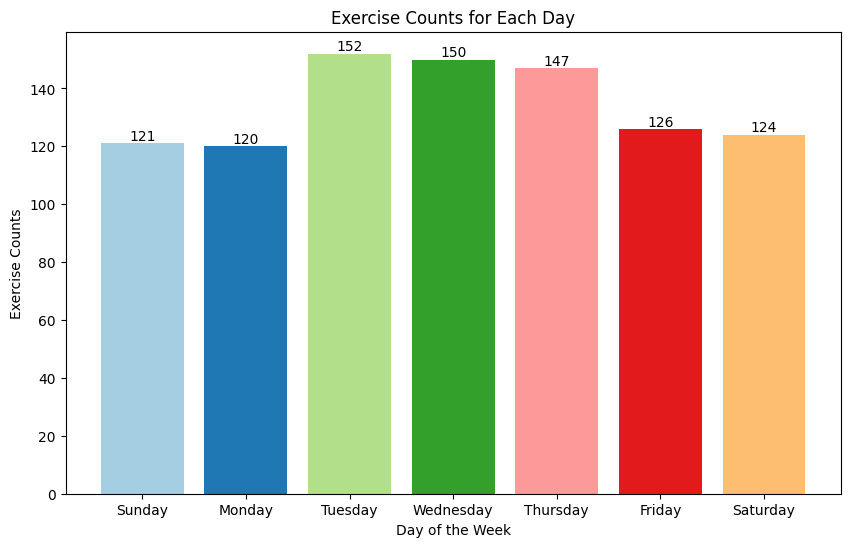

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Use a color
colors = sns.color_palette("Paired")

# Create a bar plot with different colors
bars = plt.bar(weekday_counts.keys(), weekday_counts.values(), color=colors)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Exercise Counts')
plt.title('Exercise Counts for Each Day')

# Add numbers on each bar with adjusted positioning
for bar, count in zip(bars, weekday_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

# Show the plot
plt.show()

### Average Activity Level for Each Day of the Week

In [ ]:
active_minutes_columns = ['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']
active_minutes_avg = daily_activity.groupby('WeekDay')[active_minutes_columns].mean().reindex(weekday_order)

<Figure size 1800x1200 with 0 Axes>

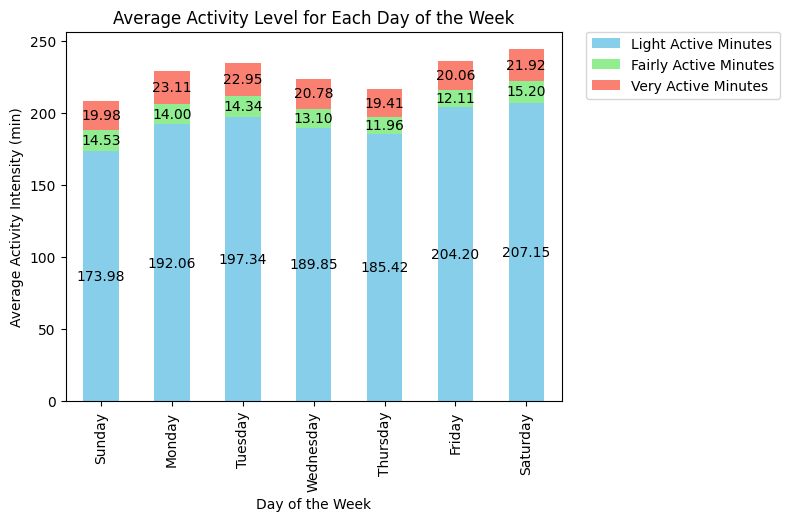

In [ ]:
# Set up the figure with larger size
plt.figure(figsize=(18, 12))

# Grouped bar plot with stacked bars for average active minutes
active_minutes_avg.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'])

# Adding numbers to each bar for average active minutes
for i, day in enumerate(weekday_order):
    total_height = 0
    for col in active_minutes_columns:
        value = active_minutes_avg.loc[day, col]
        plt.text(i, total_height + value / 2, f'{value:.2f}', ha='center', va='center', color='black')
        total_height += value

# Adding legend for average active minutes
plt.legend(["Light Active Minutes", "Fairly Active Minutes", "Very Active Minutes"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

# Adding labels and title for average active minutes
plt.xlabel('Day of the Week')
plt.ylabel('Average Activity Intensity (min)')
plt.title('Average Activity Level for Each Day of the Week')

# Show the plot
plt.show()

### Average Activity Distance for Each Day of the Week

In [ ]:
active_distance_columns = ['LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']
active_distance_avg = daily_activity.groupby('WeekDay')[active_distance_columns].mean().reindex(weekday_order)

<Figure size 1800x1200 with 0 Axes>

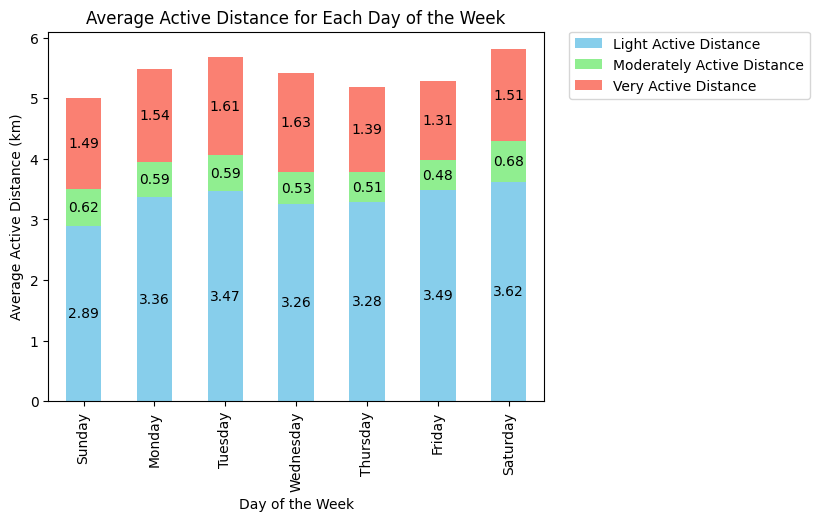

In [ ]:
# Set up the figure with a larger size
plt.figure(figsize=(18, 12))

# Grouped bar plot with stacked bars for average activity distance
active_distance_avg.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'])

# Adding numbers to each bar for average activity distance
for i, day in enumerate(weekday_order):
    total_height = 0
    for col in active_distance_columns:
        value = active_distance_avg.loc[day, col]
        plt.text(i, total_height + value / 2, f'{value:.2f}', ha='center', va='center', color='black')
        total_height += value

# Adding legend for average activity distance
plt.legend(["Light Active Distance", "Moderately Active Distance", "Very Active Distance"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

# Adding labels and title for average activity distance
plt.xlabel('Day of the Week')
plt.ylabel('Average Active Distance (km)')
plt.title('Average Active Distance for Each Day of the Week')

# Show the plot
plt.show()

In [ ]:
# Checking the columns of combined_df
combined_df.columns

Index(['Id', 'ActivityDate', 'WeekDay', 'TotalSteps', 'TotalDistance',
       'TotalActiveMinutes', 'TotalMinutes', 'TotalActiveHours',
       'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
       'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance',
       'Calories', 'TotalHoursAsleep', 'WeightKg', 'BMI', 'MinuteAverage',
       'HourlyAverage'],
      dtype='object')

In [ ]:
combined_df.describe()

,Id,WeekDay,TotalSteps,TotalDistance,TotalActiveMinutes,TotalMinutes,TotalActiveHours,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Calories,TotalHoursAsleep,WeightKg,BMI,MinuteAverage,HourlyAverage
count,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000
mean,5.296912e+09,2.913245,9076.636766,6.724007,253.183196,1222.990524,4.162139,210.791535,14.067593,28.324068,3.822798,0.600606,2.272285,2472.375237,7.191404,73.685395,25.156889,71.581029,71.407206
std,1.985409e+09,1.919299,5806.376876,4.829708,111.457691,256.804825,1.921652,96.845315,21.071884,41.550196,1.968262,0.970964,3.885306,804.620383,1.872496,12.018063,2.004821,15.987991,13.943718
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.966667,52.599998,21.450001,36.800000,43.294008
25%,4.388162e+09,1.000000,5153.000000,3.370000,211.000000,1000.000000,4.000000,147.000000,0.000000,0.000000,2.430000,0.000000,0.000000,1906.000000,6.166667,61.500000,24.000000,60.000000,60.984048
50%,5.553957e+09,3.000000,8163.000000,6.140000,262.000000,1440.000000,4.000000,232.000000,7.000000,5.000000,3.740000,0.250000,0.330000,2336.000000,7.316667,72.300003,25.410000,68.200000,69.140317
75%,6.962181e+09,5.000000,12332.000000,9.080000,343.000000,1440.000000,6.000000,273.000000,20.000000,35.000000,5.390000,0.800000,2.630000,3101.000000,8.200000,85.099998,25.590000,80.500000,79.734112
max,8.877689e+09,6.000000,36019.000000,28.030001,552.000000,1440.000000,9.000000,518.000000,143.000000,210.000000,10.710000,6.480000,21.920000,4900.000000,13.266667,133.500000,47.540001,191.000000,156.267686


### Checking if users meet WHO guidelines

In [ ]:
# Aggregate data at the user level
user_aggregated_df = daily_activity.groupby('Id').agg({
    'LightlyActiveMinutes': 'sum',
    'FairlyActiveMinutes': 'sum',
    'VeryActiveMinutes': 'sum',
    'SedentaryMinutes': 'sum'
}).reset_index()

In [ ]:
# Create a new column indicating whether the user meets the aerobic activity guidelines
user_aggregated_df['Meets_Aerobic_Guidelines'] = (
    (user_aggregated_df['LightlyActiveMinutes'] >= 150) |
    ((user_aggregated_df['FairlyActiveMinutes'] + user_aggregated_df['VeryActiveMinutes']) >= 75) |
    (((user_aggregated_df['LightlyActiveMinutes'] + user_aggregated_df['FairlyActiveMinutes'] + user_aggregated_df['VeryActiveMinutes']) >= 150) &
     ((user_aggregated_df['FairlyActiveMinutes'] + user_aggregated_df['VeryActiveMinutes']) <= 300))
)

In [ ]:
# Create a new column indicating whether the user meets the muscle-strengthening guidelines
user_aggregated_df['Meets_Muscle_Strengthening_Guidelines'] = (
    user_aggregated_df['FairlyActiveMinutes'] >= 2
)

In [ ]:
# Create a new column indicating whether the user meets the sedentary behavior guidelines
user_aggregated_df['Meets_Sedentary_Behavior_Guidelines'] = (
    user_aggregated_df['SedentaryMinutes'] <= 720  # WHO suggests limiting sedentary time, using 720 (12 hours)
)

In [ ]:
# Print the count of users meeting each guideline
print(f"Number of users meeting aerobic activity guidelines: {user_aggregated_df['Meets_Aerobic_Guidelines'].sum()}")
print(f"Number of users meeting muscle-strengthening guidelines: {user_aggregated_df['Meets_Muscle_Strengthening_Guidelines'].sum()}")
print(f"Number of users meeting sedentary behavior guidelines: {user_aggregated_df['Meets_Sedentary_Behavior_Guidelines'].sum()}")


Number of users meeting aerobic activity guidelines: 33
Number of users meeting muscle-strengthening guidelines: 33
Number of users meeting sedentary behavior guidelines: 0


In [ ]:
# Group by 'Id' and create a new column indicating sleep duration categories
sleepday['SleepDurationCategory'] = pd.cut(
    sleepday.groupby('Id')['TotalHoursAsleep'].transform('mean'),
    bins=[0, 7, 9, float('inf')],
    labels=['Less than 7 hours', '7-9 hours', 'More than 9 hours']
)

In [ ]:
# Count the number of unique users in each sleep duration category
unique_sleep_duration_counts = sleepday.groupby('SleepDurationCategory')['Id'].nunique()


In [ ]:
# Display the counts
print(unique_sleep_duration_counts)


SleepDurationCategory
Less than 7 hours    13
7-9 hours            10
More than 9 hours     1
Name: Id, dtype: int64


In [ ]:
id_column_name = 'Id'
bmi_column_name = 'BMI'
classification_column_name = 'BMI_Classification'
# Create a new column 'BMI_Classification' to store the classification for each user
weight_log['BMI_Classification'] = pd.cut(
    weight_log[bmi_column_name],
    bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
    labels=['Underweight', 'Normal weight', 'Pre-obesity', 'Obesity class I', 'Obesity class II', 'Obesity class III']
)

In [ ]:
# Drop duplicate rows based on 'Id' to keep only unique users
unique_users_df = weight_log.drop_duplicates(subset=['Id'])


In [ ]:
# Group by 'BMI_Classification' and count the occurrences for each classification
bmi_counts = unique_users_df['BMI_Classification'].value_counts()

In [ ]:
# Display the counts for each BMI classification
print(bmi_counts)


Pre-obesity          4
Normal weight        3
Obesity class III    1
Underweight          0
Obesity class I      0
Obesity class II     0
Name: BMI_Classification, dtype: int64


In [ ]:
# Get the 14 unique users from the heart_rate dataset
unique_users = heart_rate['Id'].unique()[:14]

In [ ]:
unique_users

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391])

In [ ]:
# Filter heart_rate data for these users
filtered_heart_rate = heart_rate[heart_rate['Id'].isin(unique_users)]

In [ ]:
filtered_heart_rate

,Id,ActivityDate,Value,MinuteAverage,HourlyAverage
0,2022484408,2016-04-12 08:00:00,106,107.444444,66.673115
1,2022484408,2016-04-12 09:00:00,65,64.000000,65.033879
2,2022484408,2016-04-12 10:00:00,84,86.555556,106.553668
3,2022484408,2016-04-12 12:00:00,69,69.272727,65.771296
4,2022484408,2016-04-12 13:00:00,66,66.200000,82.360444
...,...,...,...,...,...
3327,8877689391,2016-05-10 15:00:00,61,61.400000,62.163757
3328,8877689391,2016-05-10 18:00:00,71,72.333333,72.005210
3329,8877689391,2016-05-11 09:00:00,78,70.700000,67.127965
3330,8877689391,2016-05-11 10:00:00,60,60.428571,64.713975


In [ ]:
# Calculate the average heart rate for each user
average_heart_rate = filtered_heart_rate.groupby(['Id'])['MinuteAverage'].mean().reset_index()

In [ ]:
average_heart_rate

,Id,MinuteAverage
0,2022484408,78.201528
1,2026352035,85.758333
2,2347167796,75.085574
3,4020332650,82.142038
4,4388161847,64.144212
5,4558609924,80.246019
6,5553957443,65.534189
7,5577150313,67.204726
8,6117666160,82.253785
9,6775888955,91.802349


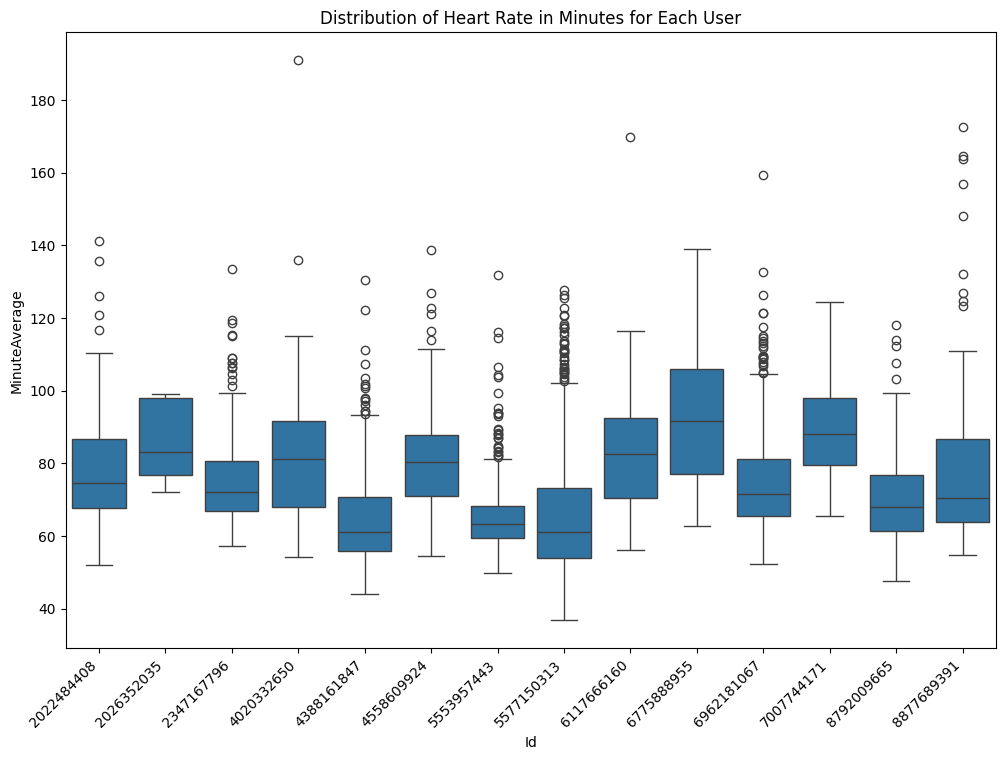

In [ ]:
# Distribution of Heart Rate in Minutes for Each User
plt.figure(figsize=(12, 8))
sns.boxplot(data=heart_rate, x='Id', y='MinuteAverage')
plt.title('Distribution of Heart Rate in Minutes for Each User')
plt.xticks(rotation=45, ha='right')
plt.show()


# A summary of the analysis

## Trends in Smart Device Usage:

**Exercise Patterns:** Users are most active on weekdays, with Tuesday being the peak exercise day.
Weekends (Saturday and Sunday) show lower exercise counts, suggesting potential variations in structured exercise routines during the weekend.

**Active Minutes and Distances:** Monday and Tuesday consistently have higher total active minutes and very active minutes.
Saturday stands out for longer total activity distances.
Lightly active minutes and distances alomst remains consistent across weekdays.

**Sleep Duration:**The average sleep duration is around 6.98 hours per night, with variability among users.
Users spend approximately 7.64 hours in bed, suggesting some time spent in bed without actual sleep.

 **Weight and BMI:**The average weight is around 72.035 kg, with an average BMI of 25.185, falling into the 'Pre-obesity' category on average.

**Heart Rate Averages:**Users have an average minute heart rate of 74.078 and an average hourly heart rate of 73.42,
variability in heart rate values indicates potential fluctuations during different activities.

## Application to Fitbit Customers:

**Tailored Exercise Plans:**Fitbit can tailor exercise plans to align with observed trends, emphasizing peak exercise days and adjusting recommendations for weekends.

**Sleep and Recovery Recommendations:**Fitbit could provide insights and recommendations to improve sleep quality, considering the average sleep duration and time spent in bed without sleep.

**Weight Management Support:**Fitbit can offer personalized weight management support based on observed weight and BMI trends, providing targeted advice and goals.

**Heart Rate Monitoring Optimization:**Fitbit could optimize heart rate monitoring features by considering variability during different activities, providing more accurate insights into users' cardiovascular health.

## Influence on Fitbit Marketing Strategy:

**Promotion of Weekday Engagement:**Fitbit could strategically promote features, challenges, or rewards that encourage weekday engagement, leveraging the observed peak exercise days.

**Sleep Improvement Features:**Marketing efforts could highlight features aimed at improving sleep quality, addressing the observed average sleep duration and time spent in bed without sleep.

**Weight Management Campaigns:**Fitbit could run targeted campaigns focusing on weight management, leveraging insights into average weight and BMI categories.

**Heart Health Awareness:**Marketing messages could emphasize the importance of heart health, showcasing how Fitbit's heart rate monitoring features adapt to various activities.

**Customized Recommendations:**Fitbit's marketing strategy can highlight the platform's ability to provide personalized recommendations based on observed trends, enhancing the user experience.

# Conclusion:




### Key Takeaways:

**Exercise Patterns**:Users showcase a strong inclination towards exercise on weekdays, peaking on Tuesdays. Weekends exhibit a decline in structured exercise, indicating potential variations in users' routines.

**Sleep Metrics:**The average sleep duration hovers around 6.99 hours, accompanied by an average of 7.64 hours spent in bed. Variability in sleep patterns emphasizes the need for personalized sleep insights.

**Weight and BMI:**The average weight of approximately 72.04 kg places users in the 'Pre-obesity' category, emphasizing the importance of weight management support.

**Heart Rate Averages:**Users demonstrate diverse heart rate averages during different activities, showcasing the potential for enhanced heart health monitoring and insights.

### Recommendations for Fitbit:

**Tailored Exercise Plans:**Fitbit can capitalize on observed exercise trends to provide tailored plans, optimizing engagement on peak exercise days and adapting recommendations for weekends.

**Sleep Improvement Features:**Enhancements to sleep tracking features can address average sleep duration, offering personalized insights for improved sleep quality and overall well-being.

**Weight Management Support:**Fitbit can offer targeted weight management support, aligning with average weight and BMI trends to guide users towards healthier lifestyles.

**Heart Health Optimization:**Further optimization of heart rate monitoring features will enhance Fitbit's ability to deliver accurate insights into users' cardiovascular health during various activities.
Marketing Strategy Implications:

### Strategic Promotions:

**Sleep Optimization Campaigns:Marketing efforts can focus on sleep improvement features, emphasizing Fitbit's role in enhancing sleep quality and overall well-being.

**Weight Management Initiatives:**Targeted campaigns can highlight Fitbit's role in weight management, offering users personalized strategies to achieve their health goals.

**Heart Health Awareness:**Fitbit can run awareness campaigns emphasizing the importance of heart health and how the platform adapts to users' cardiovascular activities.
In essence, this analysis equips Fitbit with the knowledge needed to refine its offerings, providing users with more personalized and effective tools for their health and wellness journeys. The insights gained are instrumental in shaping Fitbit's future strategies, ensuring continued empowerment of users in their pursuit of healthier lifestyles.

In [ ]:
sleepday.describe()

,Id,TotalMinutesAsleep,TotalTimeInBedMin,TotalHoursAsleep,TotalTimeInBedHour
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,419.173171,458.482927,6.986220,7.641382
std,2.060863e+09,118.635918,127.455140,1.977265,2.124252
min,1.503960e+09,58.000000,61.000000,0.966667,1.016667
25%,3.977334e+09,361.000000,403.750000,6.016667,6.729167
50%,4.702922e+09,432.500000,463.000000,7.208333,7.716667
75%,6.962181e+09,490.000000,526.000000,8.166667,8.766667
max,8.792010e+09,796.000000,961.000000,13.266667,16.016667


In [ ]:
weight_log.describe()

,Id,WeightKg,WeightPounds,BMI
count,6.700000e+01,67.000000,67.000000,67.000000
mean,7.009282e+09,72.035821,158.811801,25.185224
std,1.950322e+09,13.923206,30.695415,3.066963
min,1.503960e+09,52.599998,115.963147,21.450001
25%,6.962181e+09,61.400002,135.363832,23.959999
50%,6.962181e+09,62.500000,137.788914,24.389999
75%,8.877689e+09,85.049999,187.503152,25.559999
max,8.877689e+09,133.500000,294.317120,47.540001


In [ ]:
heart_rate.describe()

,Id,Value,MinuteAverage,HourlyAverage
count,3.332000e+03,3332.000000,3332.000000,3332.000000
mean,5.424189e+09,74.035414,74.078908,73.421927
std,1.795262e+09,16.838130,16.610596,13.746674
min,2.022484e+09,38.000000,36.800000,43.294008
25%,4.388162e+09,62.000000,62.000000,63.398097
50%,5.553957e+09,70.000000,70.500000,71.528750
75%,6.962181e+09,84.000000,83.435065,82.138599
max,8.877689e+09,191.000000,191.000000,156.267686
